In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score


from google.colab import drive

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO

def ver_imagen(df, id, original=False):
  color = df["baseColour"][id]
  local_path = f"/content/drive/MyDrive/Inteligencia Artificial I/Proyecto/Imagenes_bolsos/{color}/{id}.jpg"
  img_path = df["image"][id] if original else local_path

  print("Ruta usada:", img_path)

  # Si la ruta es una URL externa
  if str(img_path).startswith("http"):
      response = requests.get(img_path)
      img = Image.open(BytesIO(response.content))
      plt.imshow(img)
  else:
      img = mpimg.imread(img_path)
      plt.imshow(img)

  plt.axis("off")
  plt.show()

In [14]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Datos

In [4]:
df_original = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial I/Proyecto/filtered_bags_women.csv")
df = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial I/Proyecto/histogram_features_HSV.csv")

In [5]:
#Cargar dataset
df = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial I/Proyecto/histogram_features_HSV.csv")

# Separar X y
ids = df["id"]
X = df.drop(columns=["id", "color"])
Y = df["color"]

#Codificar las clases como números
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(Y)

# K-means

In [6]:
kmeans = KMeans(n_clusters=10, random_state=21)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=21)

In [52]:
#Obtener los labels generados por KMeans
labels = kmeans.labels_
df["cluster"] = labels

#Ver cuántas imágenes cayeron en cada cluster
print("\nImagenes por cluster")
cluster_counts = df["cluster"].value_counts().sort_index()
print(cluster_counts)

#Medir
print("\nMedir que tan bueno fue el modelo")
sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)

#Dimensiones de centroides
print("\ndimensione centroides")
centroids = kmeans.cluster_centers_
print(centroids.shape)

cluster_to_show = 5

#Revisar composición real de colores por cluster
print("\nColores por cluster")
cluster_color_dist = df.groupby("cluster")["color"].value_counts()
print(cluster_color_dist)

#Revisar composición real de colores por cluster
print("\nColores del cluster", cluster_to_show)
cluster_color_dist = df.groupby("cluster")["color"].value_counts()
print(cluster_color_dist[cluster_to_show])

#Obtener ids por cluster
print("\nIds en cluster", cluster_to_show)
ids_in_cluster = df[df["cluster"] == cluster_to_show]["id"][:30]
print(ids_in_cluster)


Imagenes por cluster
cluster
0     19
1    253
2    116
3     93
4      6
5    564
6     73
7     65
8     71
9     90
Name: count, dtype: int64

Medir que tan bueno fue el modelo
Silhouette Score: 0.21930408262436832

dimensione centroides
(10, 96)

Colores por cluster
cluster  color 
0        Green     18
         Grey       1
1        Purple    75
         Brown     51
         Red       41
                   ..
9        Black      1
         Green      1
         Grey       1
         Red        1
         White      1
Name: count, Length: 68, dtype: int64

Colores del cluster 5
color
Black     289
Brown      98
Grey       45
Blue       43
White      35
Purple     21
Green      13
Beige       8
Red         7
Pink        5
Name: count, dtype: int64

Ids en cluster 5
7      1159
11      786
17     1592
18     1286
20      599
21      445
22      433
40       33
52      199
59      220
68     1068
73     1087
84      877
87     1278
88     1378
101     208
116    1391
118    1263
125

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/Lino-Perros-Women-Check-Green-Handbag991fde7f204a93c0386a94aa24deae2e_images.jpg


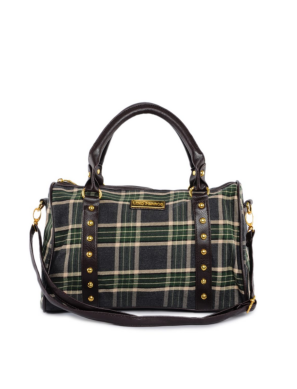

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/50dcf4437fca6e7ab2f531c5facff3f4_images.jpg


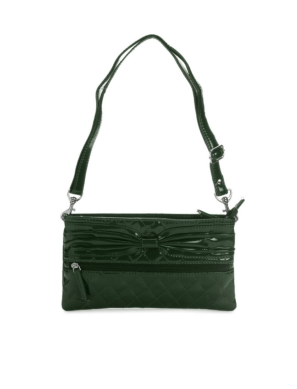

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/c5c67d8ab5c57e2925ee012cbf2260ce_images.jpg


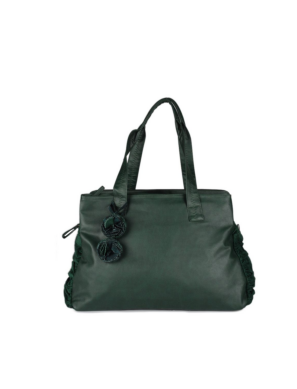

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/84fc2de6f9417a6cea01a0a74e8a0dae_images.jpg


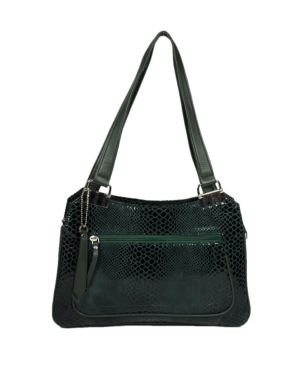

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/e752c113498e1759de9f2922fafe4251_images.jpg


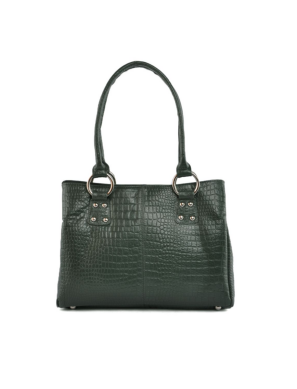

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/Kiara-Women-Blue-Handbag_84b4f24c7281d3b3b77c0b1af10f2751_images.jpg


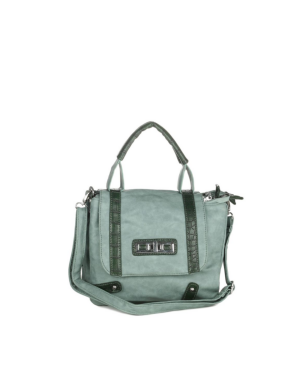

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/2501d73a151716818ddeba486ce3e6cf_images.jpg


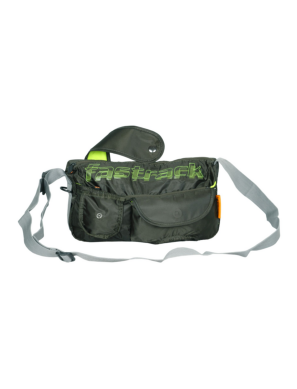

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/d5aff6e7c302aeb65ba08ec3f4a81040_images.jpg


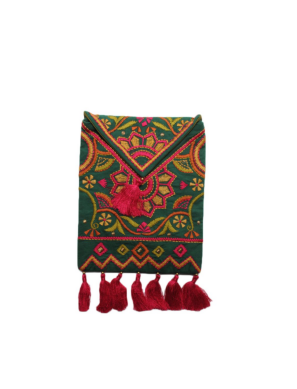

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/cbca6500ba2577a180d3feacb8b30661_images.jpg


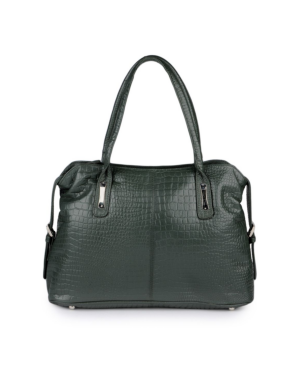

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/9e86f1dee08e26bcc16a893ec9a5dec2_images.jpg


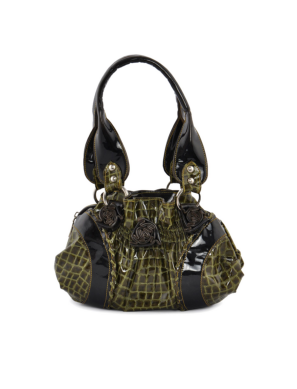

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/71be6739ca516793592010d98edb3ca7_images.jpg


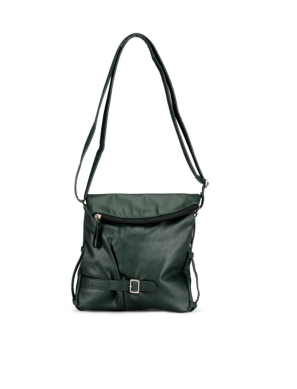

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/Lino-Perros-Women-Check-Green-Handbagd0aa58a52abd8c754679209191116042_images.jpg


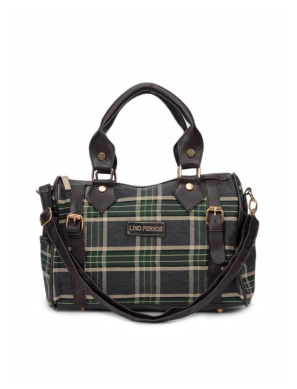

Ruta usada: http://assets.myntassets.com/v1/images/style/properties/e09a063ef8b6a5751d030bfafc2b466f_images.jpg


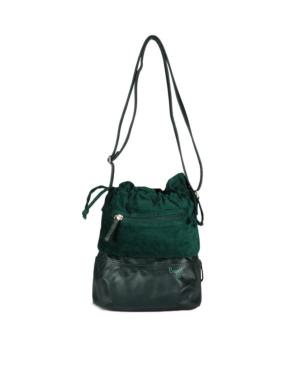

In [53]:
cluster_to_show = 5
ids_in_cluster = df[(df["cluster"] == cluster_to_show) & (df["color"] == "Green")]["id"]

for i in ids_in_cluster:
  ver_imagen(df_original, i, original=True)

# Buscando K optimo

Text(0.5, 1.0, 'The Elbow Method -inertia k')

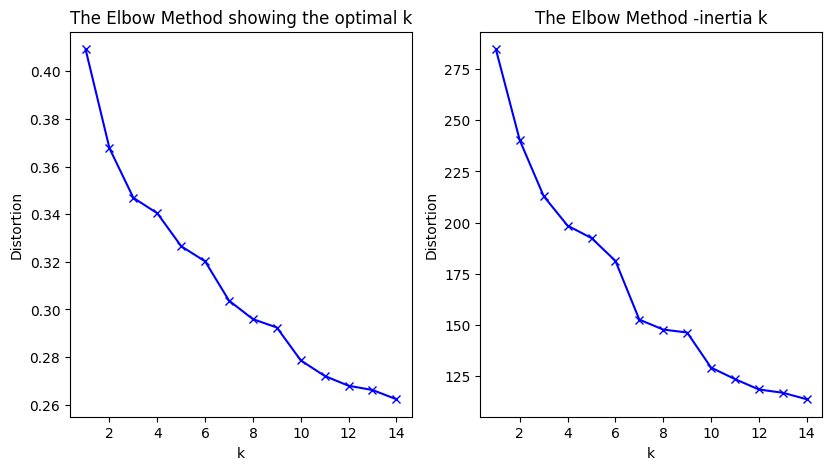

In [ ]:
from scipy.spatial.distance import cdist

distortions = []
wss = [] #Within-Cluster-Sum of Squared
K = range(1,15)
print()
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto').fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) #Forma manual de calcular las distancias entre los datos
    wss.append(kmeanModel.inertia_) # Forma

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(K, distortions, 'bx-'); plt.xlabel('k');plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.subplot(132)
plt.plot(K, wss, 'bx-'); plt.xlabel('k');plt.ylabel('Distortion')
plt.title('The Elbow Method -inertia k')

#Aglomerative Clustering

In [ ]:
agg = AgglomerativeClustering(n_clusters=10)
labels_agg = agg.fit_predict(X)

df["cluster_agg"] = labels_agg

In [ ]:
# Guardar los labels en el dataframe
df["cluster_agg"] = labels_agg

# Ver cuántas imágenes cayeron en cada cluster
print("\nImagenes por cluster")
cluster_counts = df["cluster_agg"].value_counts().sort_index()
print(cluster_counts)

# Medir que tan bueno fue el modelo
print("\nSilhouette Score Agglomerative")
sil_score = silhouette_score(X, labels_agg)
print("Silhouette Score:", sil_score)

# Revisar composición real de colores por cluster
print("\nColores por cluster")
cluster_color_dist = df.groupby("cluster_agg")["color"].value_counts()
print(cluster_color_dist)

# Elegir un cluster para inspección visual
cluster_to_show = 0

print(f"\nColores del cluster {cluster_to_show}")
print(cluster_color_dist[cluster_to_show])

# Obtener IDs de las imágenes dentro del cluster
print(f"\nIds en cluster {cluster_to_show}")
ids_in_cluster = df[df["cluster_agg"] == cluster_to_show]["id"].values[:30]
print(ids_in_cluster)



Imagenes por cluster
cluster_agg
0    477
1     73
2    313
3    124
4    178
5      6
6     51
7     48
8     46
9     34
Name: count, dtype: int64

Silhouette Score Agglomerative
Silhouette Score: 0.1428062435306737

Colores por cluster
cluster_agg  color 
0            Brown     153
             Purple     94
             Red        62
             Blue       47
             Pink       38
                      ... 
8            Red         1
             White       1
9            Beige      27
             Brown       5
             Grey        2
Name: count, Length: 63, dtype: int64

Colores del cluster 0
color
Brown     153
Purple     94
Red        62
Blue       47
Pink       38
Green      26
Black      21
Grey       21
White      12
Beige       3
Name: count, dtype: int64

Ids en cluster 0
[ 793 1187 1398  786 1112  709  636 1592 1286  445  153 1306  619   33
 1518  148  199  222 1523  220  229 1068 1026  853  877  848 1278 1378
 1445 1506]


In [ ]:
cluster_to_show = 3
ids_in_cluster = df[df["cluster_agg"] == cluster_to_show]["id"].values[:30]
for i in ids_in_cluster:
  ver_imagen(df_original, i, original=True)

Output hidden; open in https://colab.research.google.com to view.

# DBscan

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# DBSCAN es muy sensible a escalas entonces obligatorio normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=10, min_samples=3)   # puedes ajustar estos valores
labels_db = dbscan.fit_predict(X_scaled)

# Guardar los labels en el dataframe
df["cluster_dbscan"] = labels_db

# Ver cuántas imágenes cayeron en cada cluster
print("\nImagenes por cluster (incluyendo ruido -1)")
cluster_counts = df["cluster_dbscan"].value_counts().sort_index()
print(cluster_counts)

# Medir desempeño: DBSCAN puede generar ruido, así que revisar
if len(set(labels_db)) > 1:  # silhouette no funciona si hay solo 1 cluster
    print("\nSilhouette Score DBSCAN")
    sil_score = silhouette_score(X_scaled, labels_db)
    print("Silhouette Score:", sil_score)
else:
    print("\nNo se puede calcular el silhouette score (solo un cluster encontrado).")

# Revisar colores por cluster
print("\nColores por cluster (DBSCAN)")
cluster_color_dist = df.groupby("cluster_dbscan")["color"].value_counts()
print(cluster_color_dist)

# Elegir un cluster para inspeccionar
cluster_to_show = 0

if cluster_to_show in df["cluster_dbscan"].unique():
    print(f"\nColores del cluster {cluster_to_show}")
    print(cluster_color_dist[cluster_to_show])

    print(f"\nIDs en cluster {cluster_to_show}")
    ids_in_cluster = df[df["cluster_dbscan"] == cluster_to_show]["id"].values[:30]
    print(ids_in_cluster)
else:
    print(f"\nEl cluster {cluster_to_show} no existe en los resultados de DBSCAN.")



Imagenes por cluster (incluyendo ruido -1)
cluster_dbscan
-1      79
 0    1266
 1       5
Name: count, dtype: int64

Silhouette Score DBSCAN
Silhouette Score: 0.428523962691861

Colores por cluster (DBSCAN)
cluster_dbscan  color 
-1              Green      24
                Blue       13
                Purple     13
                Pink        7
                Red         6
                Brown       5
                White       4
                Black       3
                Beige       2
                Grey        2
 0              Black     312
                Brown     290
                Blue      102
                Red        99
                Purple     92
                Beige      85
                Pink       85
                Grey       81
                White      62
                Green      58
 1              Green       5
Name: count, dtype: int64

Colores del cluster 0
color
Black     312
Brown     290
Blue      102
Red        99
Purple     92
Beige      85

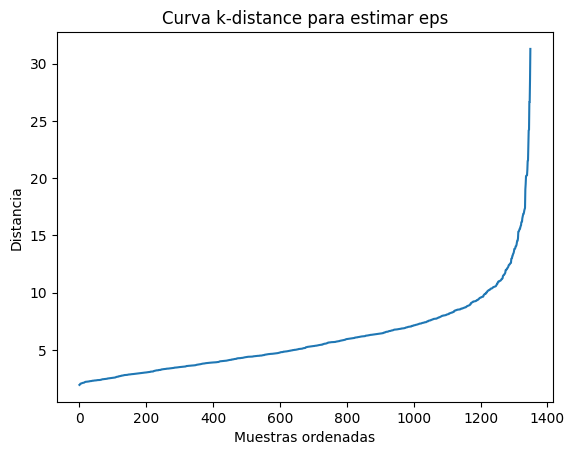

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Usar los datos ya escalados
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenar distancias
distances = np.sort(distances[:,4])  # 4 → k=5 (k-distance)
plt.plot(distances)
plt.title("Curva k-distance para estimar eps")
plt.ylabel("Distancia")
plt.xlabel("Muestras ordenadas")
plt.show()